# Import All Libraries

In [6]:
import os
import pandas as pd
import numpy as np
from os.path import dirname, abspath

In [7]:
directory_path = "C:\\Users\\kripa\\Documents\\Intro_to_ML_TMLC"

In [8]:
if os.path.exists(directory_path):
    # Change the current working directory to the specified directory
    os.chdir(directory_path)
    print(f"Directory changed to: {directory_path}")
else:
    print(f"The specified directory '{directory_path}' does not exist.")

The specified directory 'C:\Users\kripa\Documents\Intro_to_ML_TMLC' does not exist.


# Explore Content of the Dataset

In [9]:
df = pd.read_csv("/content/Restaurant.csv")

In [10]:
df.head(15)

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
5,92,19.427670,13.114473,American,43.099950,1,10,399.867507
6,96,35.350343,16.960318,American,20.181622,0,86,496.653687
7,84,46.314645,14.486349,Italian,28.921100,1,1,417.158607
8,84,22.647863,15.841873,American,11.732611,0,26,352.148065
9,97,33.532267,8.095969,Italian,37.973579,0,98,272.793517


# Info of the columns, Datatypes and the null content

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


# Data distribution in terms of mean, std, and at different levels

In [12]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


# Columns in the dataframe, Number of Rows and columns.

In [13]:
df.columns

Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Cuisine_Type',
       'Average_Customer_Spending', 'Promotions', 'Reviews',
       'Monthly_Revenue'],
      dtype='object')

In [14]:
df.shape

(1000, 8)

# Distribution of the dependent variable

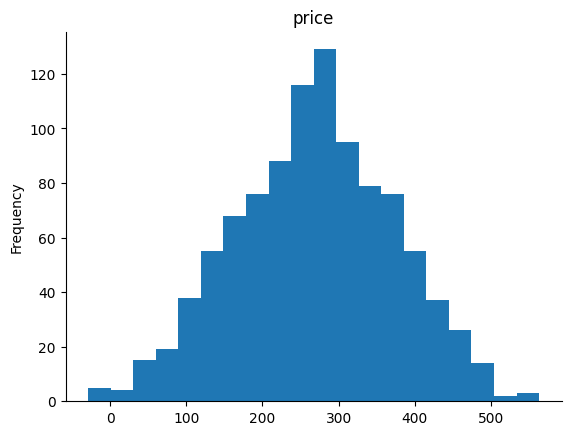

In [15]:

from matplotlib import pyplot as plt
df['Monthly_Revenue'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Distribution of all numeric columns

<Figure size 1200x600 with 0 Axes>

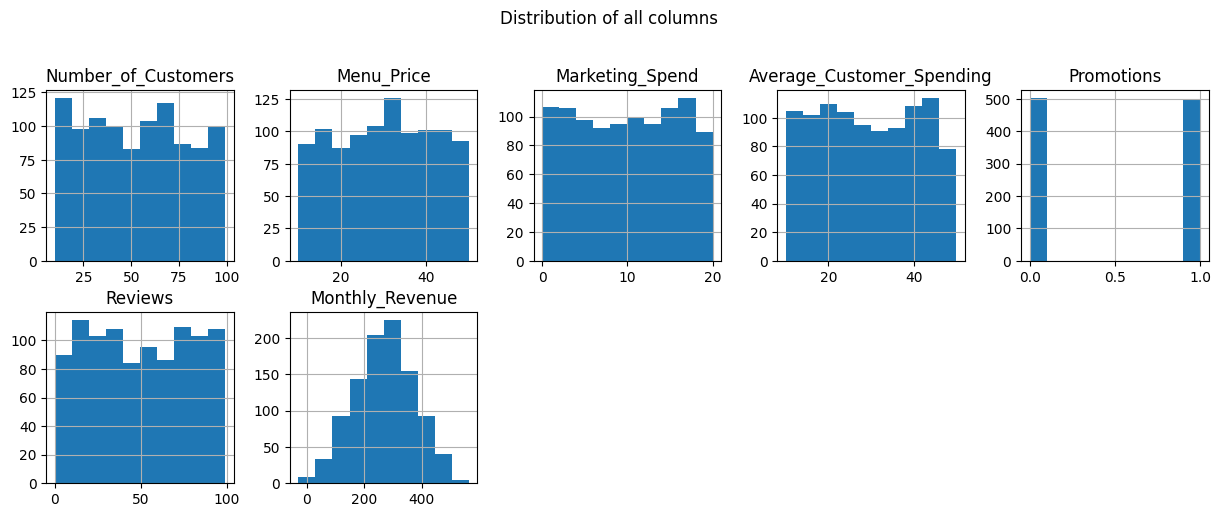

In [16]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
df.hist(layout=(3, 5), figsize=(15, 8))  # Adjust layout and figure size
plt.suptitle('Distribution of all columns')
plt.show()

# Box Plot to see the distribution and the outlier values of the dependent variable

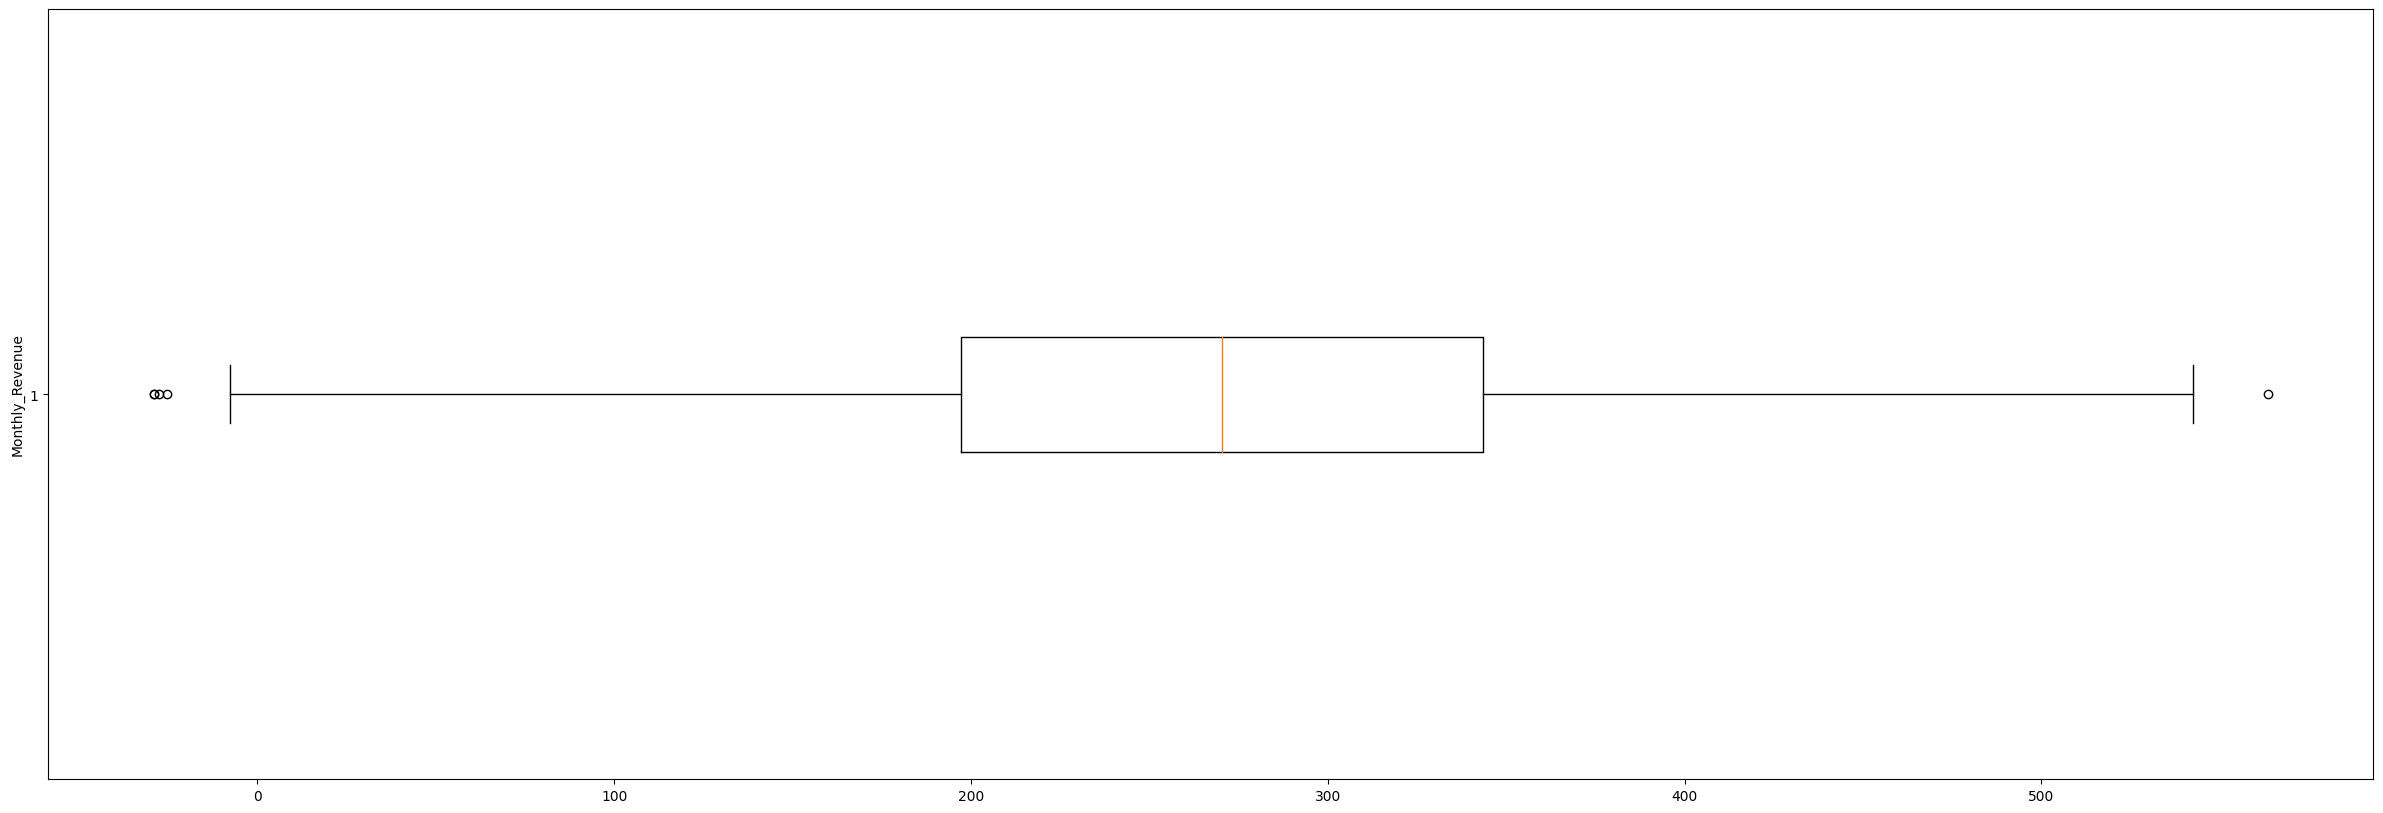

In [17]:
#boxplot for checking the price distribution
plt.figure(figsize = (30,10))
plt.boxplot(df['Monthly_Revenue'], vert = False)
plt.ylabel('Monthly_Revenue')
plt.show()


# Dropping outlier values

In [18]:
#Droping rows above a certain range
df.drop(df[df['Monthly_Revenue'] > 550].index, inplace = True)
df.drop(df[df['Monthly_Revenue'] <= 0].index, inplace = True)

In [19]:
df.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [20]:
num_cols = df.select_dtypes(include='number')

In [21]:
num_cols.columns

Index(['Number_of_Customers', 'Menu_Price', 'Marketing_Spend',
       'Average_Customer_Spending', 'Promotions', 'Reviews',
       'Monthly_Revenue'],
      dtype='object')

# Checking Correlation

In [22]:
correlation = num_cols.corr()['Monthly_Revenue']

In [23]:
correlation

Number_of_Customers          0.742002
Menu_Price                   0.266131
Marketing_Spend              0.257177
Average_Customer_Spending   -0.033048
Promotions                   0.032776
Reviews                     -0.026690
Monthly_Revenue              1.000000
Name: Monthly_Revenue, dtype: float64

In [24]:
df.head(20)

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
5,92,19.427670,13.114473,American,43.099950,1,10,399.867507
6,96,35.350343,16.960318,American,20.181622,0,86,496.653687
7,84,46.314645,14.486349,Italian,28.921100,1,1,417.158607
8,84,22.647863,15.841873,American,11.732611,0,26,352.148065
9,97,33.532267,8.095969,Italian,37.973579,0,98,272.793517


# Explore the categorical variables and identify Dummies

In [25]:
df['Cuisine_Type'].unique()

array(['Japanese', 'Italian', 'American', 'Mexican'], dtype=object)

In [26]:
i_cuisine_type_dummies = pd.get_dummies(df['Cuisine_Type'])

In [27]:
df = pd.concat([df, i_cuisine_type_dummies], axis = 'columns')

In [28]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,American,Italian,Japanese,Mexican
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040,0,0,1,0
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091,0,1,0,0
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763,0,0,1,0
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573,0,1,0,0
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121,0,1,0,0


In [29]:
df.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
American                     0
Italian                      0
Japanese                     0
Mexican                      0
dtype: int64

In [30]:
df.drop(['Cuisine_Type'], axis = 1, inplace = True)

In [31]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,American,Italian,Japanese,Mexican
0,61,43.117635,12.663793,36.236133,0,45,350.912040,0,0,1,0
1,24,40.020077,4.577892,17.952562,0,36,221.319091,0,1,0,0
2,81,41.981485,4.652911,22.600420,1,91,326.529763,0,0,1,0
3,70,43.005307,4.416053,18.984098,1,59,348.190573,0,1,0,0
4,30,17.456199,3.475052,12.766143,1,30,185.009121,0,1,0,0


# **Model Build**

In [32]:
# Independent Variable
X = df.drop(['Monthly_Revenue'], axis = 1)

In [33]:
# Dependent Variable
y = df['Monthly_Revenue']

In [34]:
# Data Split
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42)

In [35]:
# Linear Regression
from sklearn.linear_model import LinearRegression
Linear = LinearRegression()

Linear.fit(X_train, y_train)

LinearRegression()

# **Model Predict**

In [36]:
# Predict values in test data
y_pred = Linear.predict(x_test)

# **Model Evaluate**

In [37]:
# Metrics
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_pred, y_test)

45.52064972981609

# Use XGBOOST

In [38]:
from xgboost import XGBRegressor

xgbr = XGBRegressor()

# XGB fit, Predict & Evaluate

In [39]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
y_pred_xgbr = xgbr.predict(x_test)

In [41]:
mean_absolute_error(y_pred_xgbr, y_test)

54.30666537169358

# Scale the data for further model evaluation - Standadization

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
ss = StandardScaler()

In [44]:
X_train_stan = X_train.copy()
X_test_stan = x_test.copy()

In [45]:
num_cols = X_train_stan.columns.tolist()

In [46]:
for i in num_cols:
  scale = ss.fit(X_train_stan[[i]])

  X_train_stan[i] = ss.transform(X_train_stan[[i]])

  X_test_stan[i] = ss.transform(X_test_stan[[i]])

In [47]:
X_train.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,American,Italian,Japanese,Mexican
758,32,35.208350,10.258048,30.317948,0,17,0,0,0,1
331,39,11.503871,9.203245,29.314051,1,23,0,1,0,0
799,32,30.923389,14.661024,10.285683,1,96,0,1,0,0
934,88,44.933466,14.609927,42.870097,1,11,0,0,1,0
547,58,38.971412,5.253513,42.865663,0,11,0,0,0,1


In [48]:
y_train.head()

758    281.399975
331    139.522089
799     86.554866
934    436.281622
547    296.286842
Name: Monthly_Revenue, dtype: float64

# Model Build, Fit, Predict and Evaluate after scaling

In [49]:
linear_stan = LinearRegression()

linear_stan.fit(X_train_stan, y_train)

LinearRegression()

In [50]:
y_pred_stan = linear_stan.predict(X_test_stan)

In [51]:
mean_absolute_error(y_test, y_pred_stan)

45.5206497298161

# XGB after scaling

In [52]:
from xgboost import XGBRegressor

xgbr_stan = XGBRegressor()

In [53]:
xgbr.fit(X_train_stan, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
y_pred_xgbr_stan = xgbr.predict(X_test_stan)

In [55]:
mean_absolute_error(y_pred_xgbr_stan, y_test)

54.30666537169358

# Scaling - Normalization

In [56]:
from sklearn.preprocessing import MinMaxScaler
X_train_norm = X_train.copy()
X_test_norm = x_test.copy()

normobj = MinMaxScaler()
norm = normobj.fit(X_train_norm )

In [57]:
X_train_norm_transform = norm.transform(X_train_norm)
x_test_norm_transform  = norm.transform(X_test_norm)

In [58]:
print(X_train_norm_transform)

[[0.24719101 0.63052863 0.51213185 ... 0.         0.         1.        ]
 [0.3258427  0.03739231 0.45927721 ... 1.         0.         0.        ]
 [0.24719101 0.52330982 0.73275852 ... 1.         0.         0.        ]
 ...
 [0.02247191 0.81919372 0.56262774 ... 0.         0.         0.        ]
 [0.6741573  0.55643611 0.25264223 ... 0.         0.         1.        ]
 [0.07865169 0.91331934 0.48518657 ... 0.         0.         1.        ]]


# Model Fit and Predict after scaling.

In [59]:
linear_norm = LinearRegression()

linear_norm.fit(X_train_norm_transform, y_train)

LinearRegression()

In [60]:
y_pred_norm = linear_norm.predict(x_test_norm_transform)

In [61]:
mean_absolute_error(y_test, y_pred_norm )

45.29586891762207

# XGB after scaling Normalization

In [62]:
from xgboost import XGBRegressor

xgbr_norm = XGBRegressor()

xgbr.fit(X_train_norm_transform, y_train)

y_pred_xgbr_norm = xgbr.predict(x_test_norm_transform)

In [63]:
mean_absolute_error(y_test, y_pred_xgbr_norm )

54.30666537169358